In [1]:
import sys
!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [10]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.yna.co.kr/theme/mostviewed/index'
driver.get(url)

In [11]:
columns = ['순위', '기사 제목', '기사 작성일']
rank = []
title = []
date = []
##container > div > div.content03 > section > div > ul > li:nth-child(1) > div > div > strong > a > span

for i in range(1, 20):
    rank.append(i)
    title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) + ') > div > div > strong > a > span').text)
    date.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) +') > div > div > span').text)

In [12]:
import pandas as pd
df = pd.DataFrame({columns[0]: rank, columns[1]: title, columns[2]: date}, columns=columns)
df

,순위,기사 제목,기사 작성일
0,1,"결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증",2025-03-20 00:09
1,2,"김수현측, 가세연·김새론 유족 고발…""사진 공개로 수치심 유발""",2025-03-20 09:56
2,3,살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소,2025-03-20 06:27
3,4,"한총리 탄핵심판, 尹보다 먼저 선고…'국정 혼란 최소화' 관측",2025-03-20 09:35
4,5,"유승준 입국요구 세번째 비자재판…정부 ""병역기피 국익에 영향""",2025-03-20 07:49
5,6,"JK 롤링, 해리포터 배우들 또 저격…""영화 망쳤다""",2025-03-20 06:53
6,7,아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민,2025-03-20 00:51
7,8,"'이영애, 김여사와 연관' 주장한 유튜버 벌금 700만원 약식기소",2025-03-20 04:35
8,9,"계란 아닌 폭발물이었다면…경찰, 헌재 앞 경비 실패 논란",2025-03-20 03:04
9,10,"헌재, 한덕수 탄핵심판 24일 오전 10시 선고…尹 앞서 끝낸다(종합2보)",2025-03-20 09:44


In [13]:
df.to_csv('top19_news.csv', index=False)

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (41.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126562 files and direc

In [16]:
import csv
#CSV 파일 읽어오기
f = open('top19_news.csv', 'r')
rdr = csv.reader(f)

title = ''
for line in rdr:
    title = title + ' ' + line[1]
    print(title)

f.close()

 기사 제목
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발"
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발" 살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발" 살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소 한총리 탄핵심판, 尹보다 먼저 선고…'국정 혼란 최소화' 관측
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발" 살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소 한총리 탄핵심판, 尹보다 먼저 선고…'국정 혼란 최소화' 관측 유승준 입국요구 세번째 비자재판…정부 "병역기피 국익에 영향"
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발" 살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소 한총리 탄핵심판, 尹보다 먼저 선고…'국정 혼란 최소화' 관측 유승준 입국요구 세번째 비자재판…정부 "병역기피 국익에 영향" JK 롤링, 해리포터 배우들 또 저격…"영화 망쳤다"
 기사 제목 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발" 살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소 한총리 탄핵심판, 尹보다 먼저 선고…'국정 혼란 최소화' 관측 유승준 입국요구 세번째 비자재판…정부 "병역기피 국익에 영향" JK 롤링, 해리포터 배우들 또 저격…

In [17]:
#인덱스 0~5를 제외하고 6부터 슬라이싱하기
title = title[6:]
print(title)

 결혼 앞둔 20대 어린이집 교사, 삶의 끝에서 5명에게 장기기증 김수현측, 가세연·김새론 유족 고발…"사진 공개로 수치심 유발" 살해한 아내 시신 두달 넘게 차 트렁크에 은닉한 40대 구속기소 한총리 탄핵심판, 尹보다 먼저 선고…'국정 혼란 최소화' 관측 유승준 입국요구 세번째 비자재판…정부 "병역기피 국익에 영향" JK 롤링, 해리포터 배우들 또 저격…"영화 망쳤다" 아파트서 여성 차량에 체액 묻히고 도주…잡고 보니 입주민 '이영애, 김여사와 연관' 주장한 유튜버 벌금 700만원 약식기소 계란 아닌 폭발물이었다면…경찰, 헌재 앞 경비 실패 논란 헌재, 한덕수 탄핵심판 24일 오전 10시 선고…尹 앞서 끝낸다(종합2보) 尹대통령, 지지자 사망에 "정중한 위로…뜻 잘 받들겠다" 주호민 아내, 아동학대 혐의 특수교사 2심 재판서 '엄벌' 탄원 신사동 빌라 반지하서 홀로 살던 50대 남성 숨진 채 발견 오만전 홍명보호 중원엔 백승호…황인범은 출전 명단서 빠져 월급 309만원 직장인 연금 평생 5천만원 더내고 2천만원 더받아(종합2보) 尹 앞선 한덕수 선고, 미리보는 윤대통령 탄핵심판 답지 될까 '북한강 시신유기' 양광준 무기징역…"비인격적 범행 반성 의문"(종합) 韓선고일 지정에 신경 곤두선 민주…李항소심·尹선고 향배 촉각 검찰, '마약 투약 자수' 래퍼 식케이에 징역 3년6개월 구형


In [18]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 32.3 MB/s eta 0:00:00


In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

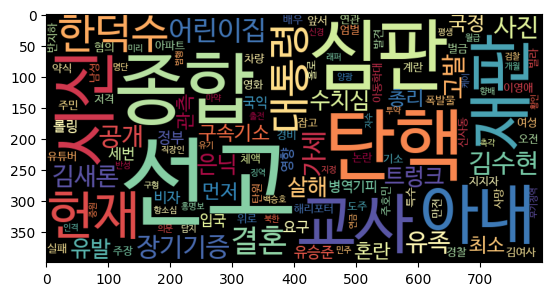

In [20]:
#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
#워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)